In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types
import yhc_module as yhc
from datetime import date

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation
today = date.today()

## Read SCM data

In [55]:
#--- open SCM data
datapath_scm = "/work/Yi-hsuan.Chen/research/edmf_CM4/data_plot.SCM/data.scm.edmf_mynn"

filename_scm_1xdiv = "SCM_am4_xanadu_edmf_mynn.v01_RF01-00cc-am4p0_aerT_clr_am4RAD_sw.1x0m5d_1x1a.atmos_edmf_mynn.nc"
files_scm_1xdiv = datapath_scm+"/"+filename_scm_1xdiv
scm_1xdiv = xr.open_dataset(files_scm_1xdiv)

files_scm_1xdiv

'/work/Yi-hsuan.Chen/research/edmf_CM4/data_plot.SCM/data.scm.edmf_mynn/SCM_am4_xanadu_edmf_mynn.v01_RF01-00cc-am4p0_aerT_clr_am4RAD_sw.1x0m5d_1x1a.atmos_edmf_mynn.nc'

In [56]:
#--- read SCM variable
pfull_tv_scm = scm_1xdiv.pfull_tv[0,:,0,0]
plev_scm = pfull_tv_scm.to_numpy()
time_scm = pfull_tv_scm.coords['time']

U_scm = scm_1xdiv.ucomp[0,:,0,0].drop(["time","lat","lon"]).rename({'pfull':'plev'}).assign_coords(plev=plev_scm)
V_scm = scm_1xdiv.vcomp[0,:,0,0].drop(["time","lat","lon"]).rename({'pfull':'plev'}).assign_coords(plev=plev_scm)
T_scm = scm_1xdiv.temp[0,:,0,0].drop(["time","lat","lon"]).rename({'pfull':'plev'}).assign_coords(plev=plev_scm)
Q_scm = scm_1xdiv.sphum[0,:,0,0].drop(["time","lat","lon"]).rename({'pfull':'plev'}).assign_coords(plev=plev_scm)
Omega_scm = scm_1xdiv.omega[0,:,0,0].drop(["time","lat","lon"]).rename({'pfull':'plev'}).assign_coords(plev=plev_scm)

#print(time_scm)

Ps_scm = xr.DataArray(101780.)
Ts_scm = xr.DataArray(291.0798)
Ug_scm = xr.DataArray(7.)
Vg_scm = xr.DataArray(-5.5)
SHflx_scm = xr.DataArray(15.)
LHflx_scm = xr.DataArray(115.)

#LHflx1_scm = xr.DataArray([115.])
#print(time_scm.to_numpy())
#Ps_scm.assign_coords({"time":2})
#print(Q_scm)
#print(scm_1xdiv.sphum[0,:,0,0])


### Save all SCM variables into a Dataset

In [59]:
#---- save variables into a Dataset

var_attrs=["Source=GFDL DYCOMS SCM"]

da_scm = U_scm.to_dataset(name = "U")
da_scm['U'] = yhc.modify_attrs(U_scm, varname = ["u"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                              attrs_add=var_attrs)
da_scm['V'] = yhc.modify_attrs(V_scm, varname = ["v"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                              attrs_add=var_attrs)
da_scm['T'] = yhc.modify_attrs(T_scm, varname = ["t"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                              attrs_add=var_attrs)
da_scm['Q'] = yhc.modify_attrs(Q_scm, varname = ["q"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                              attrs_add=var_attrs)
da_scm['Omega'] = yhc.modify_attrs(Omega_scm, varname = ["omega"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                                  attrs_add=var_attrs)
da_scm['Ps'] = yhc.modify_attrs(Ps_scm, varname = ["ps"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                               attrs_add=var_attrs)
da_scm['Ts'] = yhc.modify_attrs(Ts_scm, varname = ["ts"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                               attrs_add=var_attrs)
da_scm['Ug'] = yhc.modify_attrs(Ug_scm, varname = ["ug"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                               attrs_add=var_attrs)
da_scm['Vg'] = yhc.modify_attrs(Vg_scm, varname = ["vg"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                               attrs_add=var_attrs)
da_scm['SHflx'] = yhc.modify_attrs(SHflx_scm, varname = ["shflx"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                                  attrs_add=var_attrs)
da_scm['LHflx'] = yhc.modify_attrs(LHflx_scm, varname = ["lhflx"], attrs_del=["valid_range","cell_methods","time_avg_info"],
                                  attrs_add=var_attrs)

da_scm.plev.attrs['long_name']="Pressure"
da_scm.plev.attrs['units']="Pa"
da_scm


<xarray.Dataset>
Dimensions:  (plev: 33)
Coordinates:
  * plev     (plev) float32 216.4 584.5 1.075e+03 ... 1.01e+05 1.016e+05
Data variables:
    U        (plev) float32 ...
    V        (plev) float32 ...
    T        (plev) float32 ...
    Q        (plev) float32 ...
    Omega    (plev) float32 ...
    Ps       float64 1.018e+05
    Ts       float64 291.1
    Ug       float64 7.0
    Vg       float64 -5.5
    SHflx    float64 15.0
    LHflx    float64 115.0

In [67]:
#--- set dataset attributes
da_scm_attrs=[
    "Description=GFDL DYCOMS SCM, initial conditions",
    "Reference=Stevens et al. (2005, MWR), doi:10.1175/MWR2930.1",
    "Contact=Yi-Hsuan Chen (yi-hsuan.chen@noaa.gov)", 
    f"Date_created={today}",          
             ]
da_scm = yhc.modify_attrs(da_scm, attrs_add=da_scm_attrs)
da_scm

#--- write out to a netCDF file
da_scm_ncfile = "./data-DYCOMS_SCM_InitCond.nc"
da_scm.to_netcdf(path=da_scm_ncfile)
da_scm.close()

### Plot SCM data

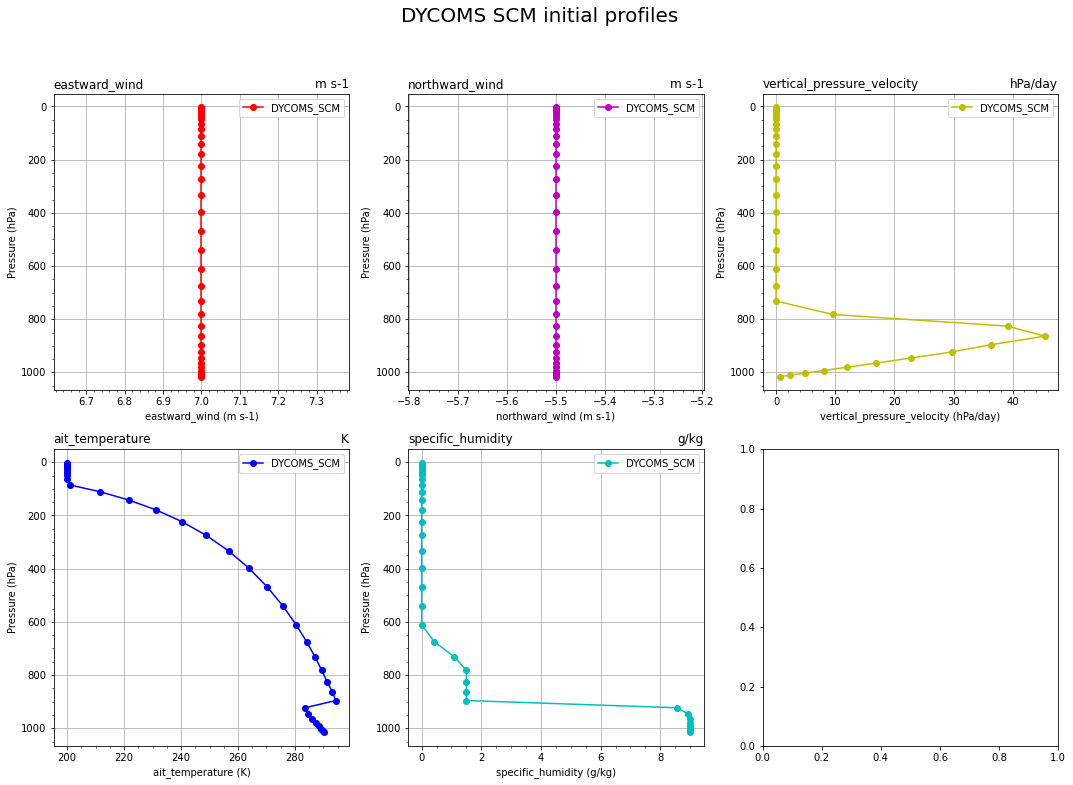

In [61]:
#--- open fig and ax
def ax_def (ax, var):

    #--- set grids
    ax.grid(True)
    ax.minorticks_on()
    
    #--- inverse axes
    ax.invert_yaxis()
    
    #--- legend
    ax.legend(["DYCOMS_SCM"])
    
    #--- set x or y labels
    ax.set_ylabel("Pressure (hPa)")

    #--- set title
    ax.set_title(var.attrs['long_name'], loc='left')
    ax.set_title(var.attrs['units'], loc='right')
    ax.set_xlabel(var.attrs['long_name']+" ("+var.attrs['units']+")")

#fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(2, 3, figsize=(18, 12))
fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

fig.suptitle("DYCOMS SCM initial profiles", fontsize=20)

#--- plot U
ax_U.plot(U_scm, pfull_tv_scm/100., 'r-o')
ax_def(ax_U, U_scm)

#--- plot V
ax_V.plot(V_scm, pfull_tv_scm/100., 'm-o')
ax_def(ax_V, V_scm)

#--- plot Omega
var_dum = yhc.unit_convert(Omega_scm,"Pa/s","hPa/day")
ax_Omega.plot( var_dum, pfull_tv_scm/100., 'y-o')
ax_def(ax_Omega, var_dum)

#--- plot T
ax_T.plot(T_scm, pfull_tv_scm/100., 'b-o')
ax_def(ax_T, T_scm)

#--- plot Omega
var_dum = yhc.unit_convert(Q_scm,"kg/kg","g/kg")
ax_Q.plot( var_dum, pfull_tv_scm/100., 'c-o')
ax_def(ax_Q, var_dum)


## Read CGILS S11_ctl data

In [62]:
#--- open CGILS data
datapath_cgils = "/work/Yi-hsuan.Chen/research/data.CGILS_forcing"

filename_ctl_s11 = datapath_cgils+"/"+"ctl_s11.nc"
ctl_s11 = xr.open_dataset(filename_ctl_s11)

In [63]:
#--- read CGILS data
lev_ctl_s11 = ctl_s11.lev

U_ctl_s11 = ctl_s11.u[0,:,0,0]
V_ctl_s11 = ctl_s11.v[0,:,0,0]
T_ctl_s11 = ctl_s11.T[0,:,0,0]
Q_ctl_s11 = ctl_s11.q[0,:,0,0]
Omega_ctl_s11 = ctl_s11.omega[0,:,0,0]
Ps_ctl_s11 = ctl_s11.Ps[0,0,0].drop(["lat","lon"])
Tg_ctl_s11 = ctl_s11.Tg[0,0,0].drop(["lat","lon"])

divT_ctl_s11 = ctl_s11.divT[0,:,0,0]
divq_ctl_s11 = ctl_s11.divq[0,:,0,0]
vertdivT_ctl_s11 = ctl_s11.vertdivT[0,:,0,0]
vertdivq_ctl_s11 = ctl_s11.vertdivq[0,:,0,0]
divT3d_ctl_s11 = ctl_s11.divT3d[0,:,0,0]
divq3d_ctl_s11 = ctl_s11.divq3d[0,:,0,0]



### Interpolate CGILS data to SCM grids

In [64]:
model = "AM4_L33_native"
pfull_ctl_s11_inSCM = yhc.mlevs_to_plevs(Ps_ctl_s11, model, "pfull")
plev_ctl_s11_inSCM = pfull_ctl_s11_inSCM.to_numpy()

U_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, U_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
V_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, V_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
T_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, T_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
Q_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, Q_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
Omega_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, Omega_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
divT_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divT_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
divq_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divq_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
vertdivT_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, vertdivT_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
vertdivq_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, vertdivq_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
divT3d_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divT3d_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])
divq3d_ctl_s11_inSCM = xr.DataArray(np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divq3d_ctl_s11), dims=['plev'], 
                                coords=[plev_ctl_s11_inSCM])


### Save CGILS variables to a Dataset

In [68]:
#---- save variables into a Dataset
da_ctl_s11_inSCM = U_ctl_s11_inSCM.to_dataset(name = "U")
var_attrs=["Source=CGILS S11_ctl"]

da_ctl_s11_inSCM['U'] = yhc.modify_attrs(U_ctl_s11_inSCM, varname = ["u"],
                                                attrs_add=var_attrs)
da_ctl_s11_inSCM['V'] = yhc.modify_attrs(V_ctl_s11_inSCM, varname = ["v"],
                                                attrs_add=var_attrs)
da_ctl_s11_inSCM['T'] = yhc.modify_attrs(T_ctl_s11_inSCM, varname = ["t"],
                                                attrs_add=var_attrs)
da_ctl_s11_inSCM['Q'] = yhc.modify_attrs(Q_ctl_s11_inSCM, varname = ["q"],
                                                attrs_add=var_attrs)
da_ctl_s11_inSCM['Omega'] = yhc.modify_attrs(Omega_ctl_s11_inSCM, varname = ["omega"],
                                                    attrs_add=var_attrs)
da_ctl_s11_inSCM['Ps'] = yhc.modify_attrs(Ps_ctl_s11, varname = ["ps"],
                                                    attrs_add=var_attrs)
da_ctl_s11_inSCM['Ts'] = yhc.modify_attrs(Tg_ctl_s11, varname = ["ts"],
                                                    attrs_add=var_attrs)
da_ctl_s11_inSCM['divT'] = yhc.modify_attrs(divT_ctl_s11_inSCM, varname = ["divt"],
                                                   attrs_add=var_attrs)
da_ctl_s11_inSCM['divq'] = yhc.modify_attrs(divq_ctl_s11_inSCM, varname = ["divq"],
                                                   attrs_add=var_attrs)
da_ctl_s11_inSCM['vertdivT'] = yhc.modify_attrs(vertdivT_ctl_s11_inSCM, varname = ["vertdivT"],
                                                       attrs_add=var_attrs)
da_ctl_s11_inSCM['vertdivq'] = yhc.modify_attrs(vertdivq_ctl_s11_inSCM, varname = ["vertdivq"],
                                                       attrs_add=var_attrs)
da_ctl_s11_inSCM['divT3d'] = yhc.modify_attrs(divT3d_ctl_s11_inSCM, varname = ["divT3d"],
                                                     attrs_add=var_attrs)
da_ctl_s11_inSCM['divq3d'] = yhc.modify_attrs(divq3d_ctl_s11_inSCM, varname = ["divq3d"],
                                                     attrs_add=var_attrs)

da_ctl_s11_inSCM.plev.attrs['long_name']="Pressure"
da_ctl_s11_inSCM.plev.attrs['units']="Pa"

da_ctl_s11_inSCM                        

<xarray.Dataset>
Dimensions:   (plev: 33)
Coordinates:
  * plev      (plev) float64 250.0 609.3 1.099e+03 ... 1.013e+05 1.019e+05
Data variables: (12/13)
    U         (plev) float64 -28.89 -27.59 -22.08 ... -1.834 -1.765 -1.765
    V         (plev) float64 0.08357 0.03997 -0.1458 ... -6.699 -6.463 -6.463
    T         (plev) float64 239.1 237.8 232.4 226.5 ... 290.1 291.0 291.1 291.1
    Q         (plev) float64 2.738e-06 2.698e-06 2.523e-06 ... 0.01059 0.01059
    Omega     (plev) float64 0.0 0.0 0.0 0.0 ... 0.004085 0.003623 0.003623
    Ps        float32 ...
    ...        ...
    divT      (plev) float64 -1.401e-06 -8.026e-07 ... -1.586e-05 -1.586e-05
    divq      (plev) float64 -0.0 0.0 0.0 ... -9.738e-09 -9.738e-09 -9.738e-09
    vertdivT  (plev) float64 0.0 0.0 0.0 ... -4.463e-07 -3.958e-07 -3.958e-07
    vertdivq  (plev) float64 0.0 0.0 0.0 0.0 ... -1.26e-09 -1.117e-09 -1.117e-09
    divT3d    (plev) float64 -1.401e-06 -8.026e-07 ... -1.626e-05 -1.626e-05
    divq3d    (plev) float64 0.0 0.0 0.0 0.0 ... -1.1e-08 -1.086e-08 -1.086e-08

In [69]:
#--- set dataset attributes
da_ctl_s11_inSCM_attrs=[
    "Description=CGILS S11_ctl, initial conditions and forcing",
    "Data=http://cloud.somas.stonybrook.edu/mzhang/cgils/cfmip_figs/"
    "Reference=Zhang et al. (2012, JAMES). doi:10.1029/2012MS000182",
    "Contact=Yi-Hsuan Chen (yi-hsuan.chen@noaa.gov)", 
    f"Date_created={today}",          
             ]
da_ctl_s11_inSCM = yhc.modify_attrs(da_ctl_s11_inSCM, attrs_add=da_ctl_s11_inSCM_attrs)
da_ctl_s11_inSCM

#--- write out to a netCDF file
da_ctl_s11_inSCM_ncfile = "./data-CGILS_S11_ctl_InitCond_Forc.nc"
da_ctl_s11_inSCM.to_netcdf(path=da_ctl_s11_inSCM_ncfile)
da_ctl_s11_inSCM.close()

### Plot CGILS data

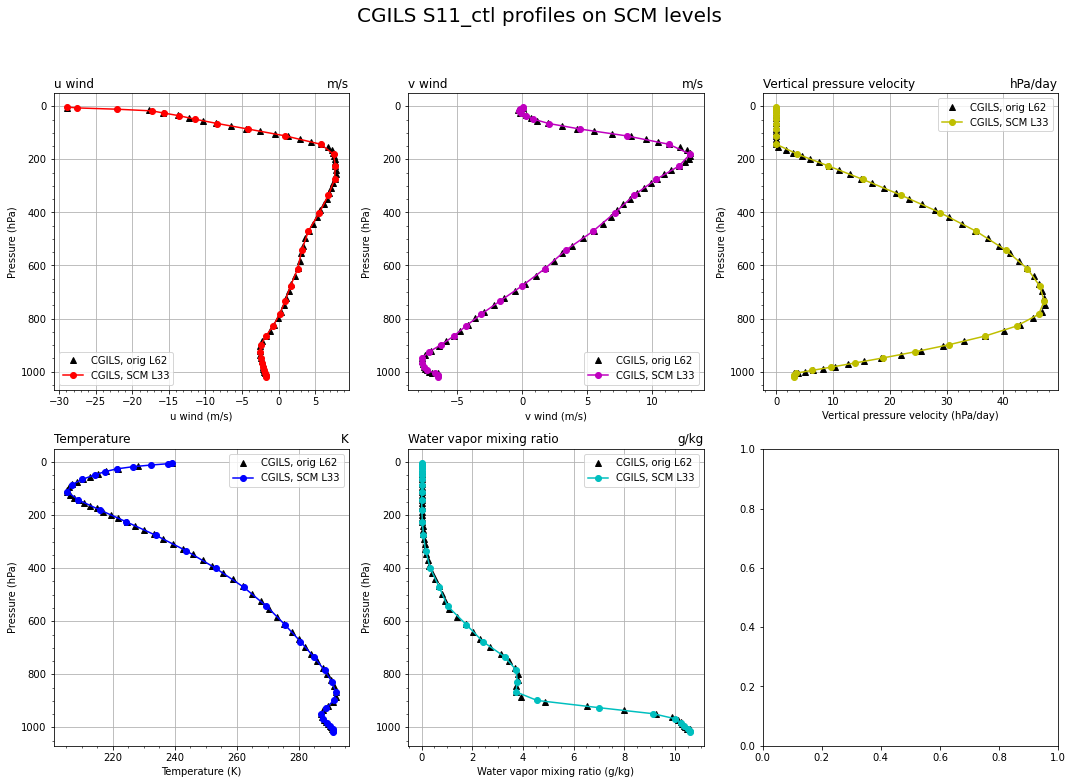

In [70]:
#--- open fig and ax
def ax_def (ax, var):

    #--- set grids
    ax.grid(True)
    ax.minorticks_on()
    
    #--- inverse axes
    ax.invert_yaxis()
    
    #--- legend
    ax.legend(["CGILS, orig L62","CGILS, SCM L33"])
    
    #--- set x or y labels
    ax.set_ylabel("Pressure (hPa)")

    #--- set title
    ax.set_title(var.attrs['long_name'], loc='left')
    ax.set_title(var.attrs['units'], loc='right')
    ax.set_xlabel(var.attrs['long_name']+" ("+var.attrs['units']+")")

#fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(2, 3, figsize=(18, 12))
fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

fig.suptitle("CGILS S11_ctl profiles on SCM levels", fontsize=20)

#--- plot U
ax_U.plot(U_ctl_s11, lev_ctl_s11/100., 'k^',
          U_ctl_s11_inSCM, pfull_ctl_s11_inSCM/100., 'r-o')
ax_def(ax_U, U_ctl_s11)

#--- plot V
ax_V.plot(V_ctl_s11, lev_ctl_s11/100., 'k^',
          V_ctl_s11_inSCM, pfull_ctl_s11_inSCM/100., 'm-o')
ax_def(ax_V, V_ctl_s11)

#--- plot Omega
ax_Omega.plot(Omega_ctl_s11*864., lev_ctl_s11/100., 'k^',
              Omega_ctl_s11_inSCM*864., pfull_ctl_s11_inSCM/100., 'y-o')
var_dum = Omega_ctl_s11.copy()
var_dum.attrs['units'] = "hPa/day"
ax_def(ax_Omega, var_dum)

#--- plot T
ax_T.plot(T_ctl_s11, lev_ctl_s11/100., 'k^',
          T_ctl_s11_inSCM, pfull_ctl_s11_inSCM/100., 'b-o')
ax_def(ax_T, T_ctl_s11)

#--- plot Q
ax_Q.plot(Q_ctl_s11*1000., lev_ctl_s11/100., 'k^',
          Q_ctl_s11_inSCM*1000., pfull_ctl_s11_inSCM/100., 'c-o')
var_dum = Q_ctl_s11.copy()
var_dum.attrs['units'] = "g/kg"
ax_def(ax_Q, var_dum)

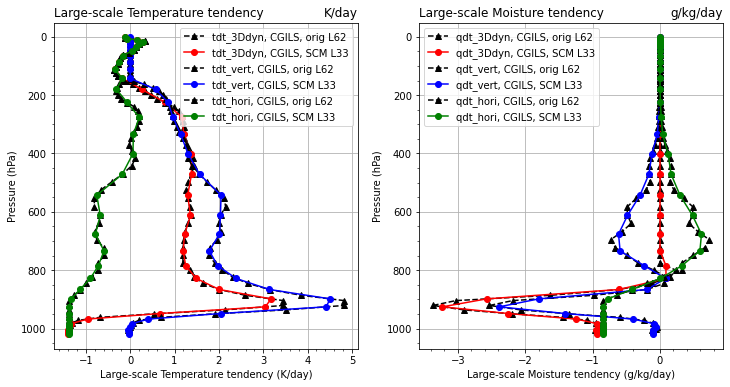

In [71]:
#divT_ctl_s11_inSCM = np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divT_ctl_s11)
#divq_ctl_s11_inSCM = np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divq_ctl_s11)
#vertdivT_ctl_s11_inSCM = np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, vertdivT_ctl_s11)
#vertdivq_ctl_s11_inSCM = np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, vertdivq_ctl_s11)
#divT3d_ctl_s11_inSCM = np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divT3d_ctl_s11)
#divq3d_ctl_s11_inSCM = np.interp(pfull_ctl_s11_inSCM, lev_ctl_s11, divq3d_ctl_s11)

fig, (ax_divT, ax_divq) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#--- plot divT
ax_divT.plot(divT3d_ctl_s11*86400., lev_ctl_s11/100., 'k--^',
             divT3d_ctl_s11_inSCM*86400., pfull_ctl_s11_inSCM/100., 'r-o',
             vertdivT_ctl_s11*86400., lev_ctl_s11/100., 'k--^',
             vertdivT_ctl_s11_inSCM*86400., pfull_ctl_s11_inSCM/100., 'b-o',
             divT_ctl_s11*86400., lev_ctl_s11/100., 'k--^',
             divT_ctl_s11_inSCM*86400., pfull_ctl_s11_inSCM/100., 'g-o',
            )
var_dum = divT_ctl_s11.copy()
var_dum.attrs['long_name'] = "Large-scale Temperature tendency"
var_dum.attrs['units'] = "K/day"
ax_def(ax_divT, var_dum)

ax_divT.legend(["tdt_3Ddyn, CGILS, orig L62", "tdt_3Ddyn, CGILS, SCM L33",
                "tdt_vert, CGILS, orig L62", "tdt_vert, CGILS, SCM L33",
                "tdt_hori, CGILS, orig L62", "tdt_hori, CGILS, SCM L33",
               ])

#--- plot divq
ax_divq.plot(divq3d_ctl_s11*864e+5, lev_ctl_s11/100., 'k--^',
             divq3d_ctl_s11_inSCM*864e+5, pfull_ctl_s11_inSCM/100., 'r-o',
             vertdivq_ctl_s11*864e+5, lev_ctl_s11/100., 'k--^',
             vertdivq_ctl_s11_inSCM*864e+5, pfull_ctl_s11_inSCM/100., 'b-o',
             divq_ctl_s11*864e+5, lev_ctl_s11/100., 'k--^',
             divq_ctl_s11_inSCM*864e+5, pfull_ctl_s11_inSCM/100., 'g-o',
            )
var_dum = divT_ctl_s11.copy()
var_dum.attrs['long_name'] = "Large-scale Moisture tendency"
var_dum.attrs['units'] = "g/kg/day"
ax_def(ax_divq, var_dum)
ax_divq.legend(["qdt_3Ddyn, CGILS, orig L62", "qdt_3Ddyn, CGILS, SCM L33",
                "qdt_vert, CGILS, orig L62", "qdt_vert, CGILS, SCM L33",
                "qdt_hori, CGILS, orig L62", "qdt_hori, CGILS, SCM L33",
               ])

## Read CGILS S12_ctl data

In [72]:
#--- open CGILS data
datapath_cgils = "/work/Yi-hsuan.Chen/research/data.CGILS_forcing"

filename_ctl_s12 = datapath_cgils+"/"+"ctl_s12.nc"
ctl_s12 = xr.open_dataset(filename_ctl_s12)

In [73]:
#--- read CGILS data
lev_ctl_s12 = ctl_s12.lev

U_ctl_s12 = ctl_s12.u[0,:,0,0]
V_ctl_s12 = ctl_s12.v[0,:,0,0]
T_ctl_s12 = ctl_s12.T[0,:,0,0]
Q_ctl_s12 = ctl_s12.q[0,:,0,0]
Omega_ctl_s12 = ctl_s12.omega[0,:,0,0]
Ps_ctl_s12 = ctl_s12.Ps[0,0,0].drop(["lat","lon"])
Tg_ctl_s12 = ctl_s12.Tg[0,0,0].drop(["lat","lon"])

divT_ctl_s12 = ctl_s12.divT[0,:,0,0]
divq_ctl_s12 = ctl_s12.divq[0,:,0,0]
vertdivT_ctl_s12 = ctl_s12.vertdivT[0,:,0,0]
vertdivq_ctl_s12 = ctl_s12.vertdivq[0,:,0,0]
divT3d_ctl_s12 = ctl_s12.divT3d[0,:,0,0]
divq3d_ctl_s12 = ctl_s12.divq3d[0,:,0,0]


In [74]:
model = "AM4_L33_native"
pfull_ctl_s12_inSCM = yhc.mlevs_to_plevs(Ps_ctl_s12, model, "pfull")
plev_ctl_s12_inSCM = pfull_ctl_s12_inSCM.to_numpy()

U_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, U_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
V_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, V_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
T_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, T_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
Q_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, Q_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
Omega_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, Omega_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
divT_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divT_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
divq_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divq_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
vertdivT_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, vertdivT_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
vertdivq_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, vertdivq_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
divT3d_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divT3d_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])
divq3d_ctl_s12_inSCM = xr.DataArray(np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divq3d_ctl_s12), dims=['plev'], 
                                coords=[plev_ctl_s12_inSCM])


### Save CGILS variables to a Dataset

In [76]:
#---- save variables into a Dataset
da_ctl_s12_inSCM = U_ctl_s12_inSCM.to_dataset(name = "U")
var_attrs=["Source=CGILS s12_ctl"]

da_ctl_s12_inSCM['U'] = yhc.modify_attrs(U_ctl_s12_inSCM, varname = ["u"],
                                                attrs_add=var_attrs)
da_ctl_s12_inSCM['V'] = yhc.modify_attrs(V_ctl_s12_inSCM, varname = ["v"],
                                                attrs_add=var_attrs)
da_ctl_s12_inSCM['T'] = yhc.modify_attrs(T_ctl_s12_inSCM, varname = ["t"],
                                                attrs_add=var_attrs)
da_ctl_s12_inSCM['Q'] = yhc.modify_attrs(Q_ctl_s12_inSCM, varname = ["q"],
                                                attrs_add=var_attrs)
da_ctl_s12_inSCM['Omega'] = yhc.modify_attrs(Omega_ctl_s12_inSCM, varname = ["omega"],
                                                    attrs_add=var_attrs)
da_ctl_s12_inSCM['Ps'] = yhc.modify_attrs(Ps_ctl_s12, varname = ["ps"],
                                                    attrs_add=var_attrs)
da_ctl_s12_inSCM['Ts'] = yhc.modify_attrs(Tg_ctl_s12, varname = ["ts"],
                                                    attrs_add=var_attrs)
da_ctl_s12_inSCM['divT'] = yhc.modify_attrs(divT_ctl_s12_inSCM, varname = ["divt"],
                                                   attrs_add=var_attrs)
da_ctl_s12_inSCM['divq'] = yhc.modify_attrs(divq_ctl_s12_inSCM, varname = ["divq"],
                                                   attrs_add=var_attrs)
da_ctl_s12_inSCM['vertdivT'] = yhc.modify_attrs(vertdivT_ctl_s12_inSCM, varname = ["vertdivT"],
                                                       attrs_add=var_attrs)
da_ctl_s12_inSCM['vertdivq'] = yhc.modify_attrs(vertdivq_ctl_s12_inSCM, varname = ["vertdivq"],
                                                       attrs_add=var_attrs)
da_ctl_s12_inSCM['divT3d'] = yhc.modify_attrs(divT3d_ctl_s12_inSCM, varname = ["divT3d"],
                                                     attrs_add=var_attrs)
da_ctl_s12_inSCM['divq3d'] = yhc.modify_attrs(divq3d_ctl_s12_inSCM, varname = ["divq3d"],
                                                     attrs_add=var_attrs)

da_ctl_s12_inSCM.plev.attrs['long_name']="Pressure"
da_ctl_s12_inSCM.plev.attrs['units']="Pa"

da_ctl_s12_inSCM   

<xarray.Dataset>
Dimensions:   (plev: 33)
Coordinates:
  * plev      (plev) float64 250.0 609.3 1.099e+03 ... 1.011e+05 1.017e+05
Data variables: (12/13)
    U         (plev) float64 -27.24 -25.99 -20.68 -16.04 ... 2.316 2.12 2.12
    V         (plev) float64 0.1732 0.1318 -0.04444 ... -8.82 -8.001 -8.001
    T         (plev) float64 239.8 238.5 233.0 227.0 ... 288.2 289.0 289.3 289.3
    Q         (plev) float64 2.848e-06 2.803e-06 2.609e-06 ... 0.009889 0.009889
    Omega     (plev) float64 0.0 0.0 0.0 0.0 ... 0.008202 0.006247 0.006247
    Ps        float32 ...
    ...        ...
    divT      (plev) float64 -7.352e-07 -1.824e-07 ... -1.28e-05 -1.28e-05
    divq      (plev) float64 -0.0 0.0 0.0 ... -7.382e-09 -7.382e-09 -7.382e-09
    vertdivT  (plev) float64 0.0 0.0 0.0 ... -3.213e-07 -3.033e-07 -3.033e-07
    vertdivq  (plev) float64 0.0 0.0 0.0 ... -2.097e-09 -1.787e-09 -1.787e-09
    divT3d    (plev) float64 -7.352e-07 -1.824e-07 ... -1.31e-05 -1.31e-05
    divq3d    (plev) float64 0.0 0.0 0.0 0.0 ... -9.479e-09 -9.17e-09 -9.17e-09

In [77]:
#--- set dataset attributes
da_ctl_s12_inSCM_attrs=[
    "Description=CGILS S12_ctl, initial conditions and forcing",
    "Data=http://cloud.somas.stonybrook.edu/mzhang/cgils/cfmip_figs/"
    "Reference=Zhang et al. (2012, JAMES). doi:10.1029/2012MS000182",
    "Contact=Yi-Hsuan Chen (yi-hsuan.chen@noaa.gov)", 
    f"Date_created={today}",          
             ]
da_ctl_s12_inSCM = yhc.modify_attrs(da_ctl_s12_inSCM, attrs_add=da_ctl_s12_inSCM_attrs)
da_ctl_s12_inSCM

#--- write out to a netCDF file
da_ctl_s12_inSCM_ncfile = "./data-CGILS_S12_ctl_InitCond_Forc.nc"
da_ctl_s12_inSCM.to_netcdf(path=da_ctl_s12_inSCM_ncfile)
da_ctl_s12_inSCM.close()

### Plot CGILS data

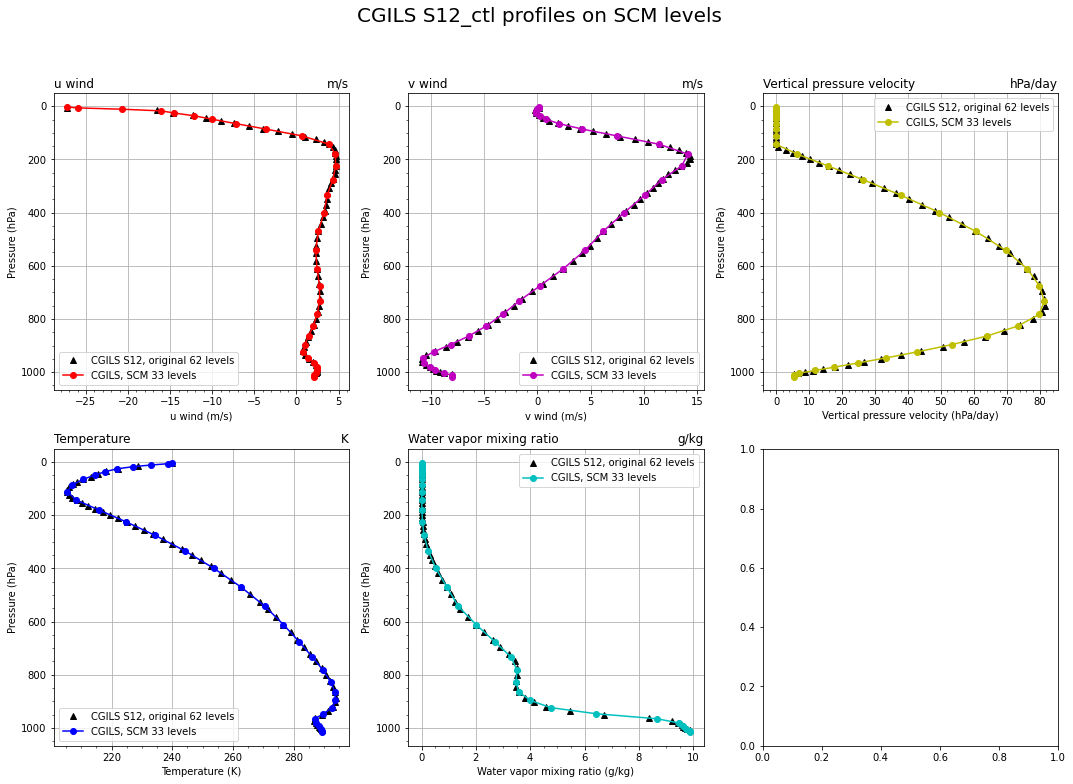

In [78]:
#--- open fig and ax
def ax_def (ax, var):

    #--- set grids
    ax.grid(True)
    ax.minorticks_on()
    
    #--- inverse axes
    ax.invert_yaxis()
    
    #--- legend
    ax.legend(["CGILS S12, original 62 levels","CGILS, SCM 33 levels"])
    
    #--- set x or y labels
    ax.set_ylabel("Pressure (hPa)")

    #--- set title
    ax.set_title(var.attrs['long_name'], loc='left')
    ax.set_title(var.attrs['units'], loc='right')
    ax.set_xlabel(var.attrs['long_name']+" ("+var.attrs['units']+")")

#fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(2, 3, figsize=(18, 12))
fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

fig.suptitle("CGILS S12_ctl profiles on SCM levels", fontsize=20)

#--- plot U
ax_U.plot(U_ctl_s12, lev_ctl_s12/100., 'k^',
          U_ctl_s12_inSCM, pfull_ctl_s12_inSCM/100., 'r-o')
ax_def(ax_U, U_ctl_s12)

#--- plot V
ax_V.plot(V_ctl_s12, lev_ctl_s12/100., 'k^',
          V_ctl_s12_inSCM, pfull_ctl_s12_inSCM/100., 'm-o')
ax_def(ax_V, V_ctl_s12)

#--- plot Omega
ax_Omega.plot(Omega_ctl_s12*864., lev_ctl_s12/100., 'k^',
              Omega_ctl_s12_inSCM*864., pfull_ctl_s12_inSCM/100., 'y-o')
var_dum = Omega_ctl_s12.copy()
var_dum.attrs['units'] = "hPa/day"
ax_def(ax_Omega, var_dum)

#--- plot T
ax_T.plot(T_ctl_s12, lev_ctl_s12/100., 'k^',
          T_ctl_s12_inSCM, pfull_ctl_s12_inSCM/100., 'b-o')
ax_def(ax_T, T_ctl_s12)

#--- plot Q
ax_Q.plot(Q_ctl_s12*1000., lev_ctl_s12/100., 'k^',
          Q_ctl_s12_inSCM*1000., pfull_ctl_s12_inSCM/100., 'c-o')
var_dum = Q_ctl_s12.copy()
var_dum.attrs['units'] = "g/kg"
ax_def(ax_Q, var_dum)

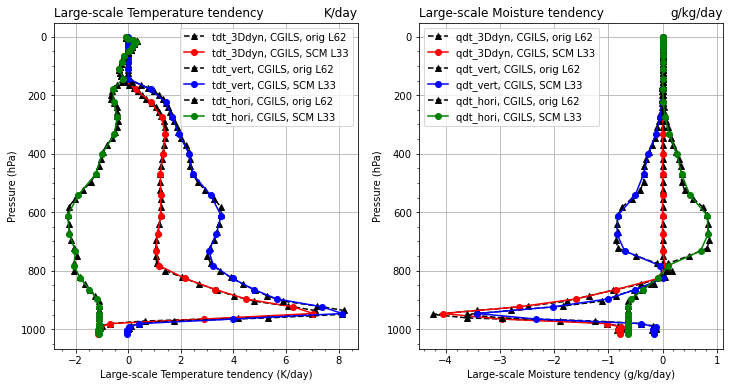

In [79]:
#divT_ctl_s12_inSCM = np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divT_ctl_s12)
#divq_ctl_s12_inSCM = np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divq_ctl_s12)
#vertdivT_ctl_s12_inSCM = np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, vertdivT_ctl_s12)
#vertdivq_ctl_s12_inSCM = np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, vertdivq_ctl_s12)
#divT3d_ctl_s12_inSCM = np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divT3d_ctl_s12)
#divq3d_ctl_s12_inSCM = np.interp(pfull_ctl_s12_inSCM, lev_ctl_s12, divq3d_ctl_s12)

fig, (ax_divT, ax_divq) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#--- plot divT
ax_divT.plot(divT3d_ctl_s12*86400., lev_ctl_s12/100., 'k--^',
             divT3d_ctl_s12_inSCM*86400., pfull_ctl_s12_inSCM/100., 'r-o',
             vertdivT_ctl_s12*86400., lev_ctl_s12/100., 'k--^',
             vertdivT_ctl_s12_inSCM*86400., pfull_ctl_s12_inSCM/100., 'b-o',
             divT_ctl_s12*86400., lev_ctl_s12/100., 'k--^',
             divT_ctl_s12_inSCM*86400., pfull_ctl_s12_inSCM/100., 'g-o',
            )
var_dum = divT_ctl_s12.copy()
var_dum.attrs['long_name'] = "Large-scale Temperature tendency"
var_dum.attrs['units'] = "K/day"
ax_def(ax_divT, var_dum)

ax_divT.legend(["tdt_3Ddyn, CGILS, orig L62", "tdt_3Ddyn, CGILS, SCM L33",
                "tdt_vert, CGILS, orig L62", "tdt_vert, CGILS, SCM L33",
                "tdt_hori, CGILS, orig L62", "tdt_hori, CGILS, SCM L33",
               ])

#--- plot divq
ax_divq.plot(divq3d_ctl_s12*864e+5, lev_ctl_s12/100., 'k--^',
             divq3d_ctl_s12_inSCM*864e+5, pfull_ctl_s12_inSCM/100., 'r-o',
             vertdivq_ctl_s12*864e+5, lev_ctl_s12/100., 'k--^',
             vertdivq_ctl_s12_inSCM*864e+5, pfull_ctl_s12_inSCM/100., 'b-o',
             divq_ctl_s12*864e+5, lev_ctl_s12/100., 'k--^',
             divq_ctl_s12_inSCM*864e+5, pfull_ctl_s12_inSCM/100., 'g-o',
            )
var_dum = divT_ctl_s12.copy()
var_dum.attrs['long_name'] = "Large-scale Moisture tendency"
var_dum.attrs['units'] = "g/kg/day"
ax_def(ax_divq, var_dum)
ax_divq.legend(["qdt_3Ddyn, CGILS, orig L62", "qdt_3Ddyn, CGILS, SCM L33",
                "qdt_vert, CGILS, orig L62", "qdt_vert, CGILS, SCM L33",
                "qdt_hori, CGILS, orig L62", "qdt_hori, CGILS, SCM L33",
               ])

## Read MERRA-2 data

In [80]:
#--- open MERRA-2 data
datapath_merra2 = "/work/Yi-hsuan.Chen/research/edmf_CM4/data_plot.AM4/data.MERRA-2.tavg3_3d_asm_Nv.200107"
filename_merra2 = "MERRA2_300.tavg3_3d_asm_Nv.20010710.SUB.nc"

files_input_merra2 = datapath_merra2+"/"+filename_merra2

#--- use xarray to open the files
data_merra2 = xr.open_dataset(files_input_merra2)
data_merra2 = yhc.wrap360(data_merra2)   # change lon from -180~180 to 0-360
data_merra2

#--- MERRA-2 tdt data
datapath_merra2_tdt = "/work/Yi-hsuan.Chen/research/edmf_CM4/data_plot.AM4/data.MERRA-2.tavg3_3d_tdt_Np.200107"
filename_merra2_tdt = "MERRA2_300.tavg3_3d_tdt_Np.20010710.SUB.nc"
files_input_merra2_tdt = datapath_merra2_tdt+"/"+filename_merra2_tdt

data_merra2_tdt = xr.open_dataset(files_input_merra2_tdt)
data_merra2_tdt = yhc.wrap360(data_merra2_tdt)
data_merra2_tdt

#--- MERRA-2 qdt data
datapath_merra2_qdt = "/work/Yi-hsuan.Chen/research/edmf_CM4/data_plot.AM4/data.MERRA-2.tavg3_3d_qdt_Np.200107"
filename_merra2_qdt = "MERRA2_300.tavg3_3d_qdt_Np.20010710.SUB.nc"
files_input_merra2_qdt = datapath_merra2_qdt+"/"+filename_merra2_qdt

data_merra2_qdt = xr.open_dataset(files_input_merra2_qdt)
data_merra2_qdt = yhc.wrap360(data_merra2_qdt)
#data_merra2_qdt

#--- MERRA-2 slv data
datapath_merra2_slv = "/work/Yi-hsuan.Chen/research/edmf_CM4/data_plot.AM4/data.MERRA-2.tavg1_2d_slv_Nx.200107"
filename_merra2_slv = "MERRA2_300.tavg1_2d_slv_Nx.20010710.SUB.nc"
files_input_merra2_slv = datapath_merra2_slv+"/"+filename_merra2_slv

data_merra2_slv = xr.open_dataset(files_input_merra2_slv)
data_merra2_slv = yhc.wrap360(data_merra2_slv)
#data_merra2_slv

### Read MARRA-2 variables

In [81]:
time_step_merra2 = "2001-07-10T10:30:00.000000000"
region = "DYCOMS"

T_merra2 = yhc.get_area_avg(data_merra2.T.sel(time=time_step_merra2), region)
Q_merra2 = yhc.get_area_avg(data_merra2.QV.sel(time=time_step_merra2), region)
U_merra2 = yhc.get_area_avg(data_merra2.U.sel(time=time_step_merra2), region)
V_merra2 = yhc.get_area_avg(data_merra2.V.sel(time=time_step_merra2), region)
Omega_merra2 = yhc.get_area_avg(data_merra2.OMEGA.sel(time=time_step_merra2), region)
Ps_merra2 = yhc.get_area_avg(data_merra2.PS.sel(time=time_step_merra2), region)
pfull_merra2 = yhc.get_area_avg(data_merra2.PL.sel(time=time_step_merra2), region)

divT3d_merra2 = yhc.get_area_avg(data_merra2_tdt.DTDTDYN.sel(time=time_step_merra2), region)
divq3d_merra2 = yhc.get_area_avg(data_merra2_qdt.DQVDTDYN.sel(time=time_step_merra2), region)
plev_merra2 = data_merra2_qdt.lev.copy()

Ps_slv_merra2 = yhc.get_area_avg(data_merra2_slv.PS.sel(time=time_step_merra2), region)
Ts_slv_merra2 = yhc.get_area_avg(data_merra2_slv.TS.sel(time=time_step_merra2), region)

Ug_merra2 = Ug_scm.copy()
Vg_merra2 = Vg_scm.copy()
SHflx_merra2 = SHflx_scm.copy()
LHflx_merra2 = LHflx_scm.copy()

#yhc.printv(Ps_merra2, "PS 01", "r")
#yhc.printv(Ps_slv_merra2, "PS_slv", "blue")

#yhc.printv(T_merra2, "PS 01", "g")
#yhc.printv(Ts_slv_merra2, "TS 01", "r")

#Ps_slv_merra2
#Ug_merra2

### Interpolate MERRA-2 data onto SCM levels

In [82]:
#--- Get SCM pressure levels with the MERRA-2 surface pressure
model = "AM4_L33_native"
pfull_merra2_inSCM = yhc.mlevs_to_plevs(Ps_merra2, model, "pfull")
plev_merra2_inSCM = pfull_merra2_inSCM.to_numpy()

U_merra2_inSCM = xr.DataArray(np.interp(pfull_merra2_inSCM, pfull_merra2, U_merra2), dims=['plev'], 
                                coords=[plev_merra2_inSCM])
V_merra2_inSCM = xr.DataArray(np.interp(pfull_merra2_inSCM, pfull_merra2, V_merra2), dims=['plev'], 
                                coords=[plev_merra2_inSCM])
T_merra2_inSCM = xr.DataArray(np.interp(pfull_merra2_inSCM, pfull_merra2, T_merra2), dims=['plev'], 
                                coords=[plev_merra2_inSCM])
Q_merra2_inSCM = xr.DataArray(np.interp(pfull_merra2_inSCM, pfull_merra2, Q_merra2), dims=['plev'], 
                                coords=[plev_merra2_inSCM])
Omega_merra2_inSCM = xr.DataArray(np.interp(pfull_merra2_inSCM, pfull_merra2, Omega_merra2), dims=['plev'], 
                                coords=[plev_merra2_inSCM])
divT3d_merra2_inSCM = xr.DataArray(np.interp(pfull_merra2_inSCM, plev_merra2[::-1]*100., divT3d_merra2[::-1]), dims=['plev'], 
                                coords=[plev_merra2_inSCM])
divq3d_merra2_inSCM = xr.DataArray(np.interp(pfull_merra2_inSCM, plev_merra2[::-1]*100., divq3d_merra2[::-1]), dims=['plev'], 
                                coords=[plev_merra2_inSCM])


In [83]:
#---- save variables into a Dataset
var_attrs=["Source=MERRA-2"]

da_merra2_inSCM = U_merra2_inSCM.to_dataset(name = "U")
da_merra2_inSCM['U'] = yhc.modify_attrs(U_merra2_inSCM, varname = ["u"],
                                       attrs_add=var_attrs)
da_merra2_inSCM['V'] = yhc.modify_attrs(V_merra2_inSCM, varname = ["v"],
                                       attrs_add=var_attrs)
da_merra2_inSCM['T'] = yhc.modify_attrs(T_merra2_inSCM, varname = ["t"],
                                       attrs_add=var_attrs)
da_merra2_inSCM['Q'] = yhc.modify_attrs(Q_merra2_inSCM, varname = ["q"],
                                       attrs_add=var_attrs)
da_merra2_inSCM['Omega'] = yhc.modify_attrs(Omega_merra2_inSCM, varname = ["omega"],
                                           attrs_add=var_attrs)
da_merra2_inSCM['divT3d'] = yhc.modify_attrs(divT3d_merra2_inSCM, varname = ["divT3d"],
                                            attrs_add=var_attrs)
da_merra2_inSCM['divq3d'] = yhc.modify_attrs(divq3d_merra2_inSCM, varname = ["divq3d"],
                                            attrs_add=var_attrs)

da_merra2_inSCM['Ps'] = yhc.modify_attrs(Ps_merra2.drop("time"), varname = ["ps"], 
                               attrs_add=var_attrs)
da_merra2_inSCM['Ts'] = yhc.modify_attrs(Ts_slv_merra2.drop("time"), varname = ["ts"],
                               attrs_add=var_attrs)
da_merra2_inSCM['Ug'] = yhc.modify_attrs(Ug_merra2, varname = ["ug"],
                               attrs_add=var_attrs)
da_merra2_inSCM['Vg'] = yhc.modify_attrs(Vg_merra2, varname = ["vg"], 
                               attrs_add=var_attrs)
da_merra2_inSCM['SHflx'] = yhc.modify_attrs(SHflx_merra2, varname = ["shflx"], 
                                  attrs_add=var_attrs)
da_merra2_inSCM['LHflx'] = yhc.modify_attrs(LHflx_merra2, varname = ["lhflx"], 
                                  attrs_add=var_attrs)

da_merra2_inSCM.plev.attrs['long_name']="Pressure"
da_merra2_inSCM.plev.attrs['units']="Pa"

da_merra2_inSCM



<xarray.Dataset>
Dimensions:  (plev: 33)
Coordinates:
  * plev     (plev) float64 250.0 609.3 1.099e+03 ... 1.011e+05 1.016e+05
Data variables: (12/13)
    U        (plev) float64 -34.17 -26.28 -22.13 -17.51 ... 6.647 6.482 6.482
    V        (plev) float64 -3.825 0.6789 -0.7411 ... -4.071 -3.982 -3.982
    T        (plev) float64 255.2 240.6 231.9 226.6 ... 288.4 289.3 289.9 289.9
    Q        (plev) float64 3.743e-06 3.419e-06 3.17e-06 ... 0.009323 0.009323
    Omega    (plev) float64 -0.0001843 -0.0003332 ... 0.001715 0.001715
    divT3d   (plev) float64 -1.862e-05 -1.134e-05 ... -1.444e-05 -1.444e-05
    ...       ...
    Ps       float64 1.018e+05
    Ts       float64 291.7
    Ug       float64 7.0
    Vg       float64 -5.5
    SHflx    float64 15.0
    LHflx    float64 115.0

In [85]:
#--- set dataset attributes
da_merra2_inSCM_attrs=[
    "Description=MERRA-2, a set of 3-hr avg fields in DYCOMS region",
    "DYCOMS_region=(30-32.2N, 120-123.8W)",
    "Data_time=3hr-avg at 1030UTC, July 10, 2001",
    "Data_InitCond=tavg3_3d_asm_Nv (M2T3NVASM) and avg1_2d_slv_Nx (M2T1NXSLV)",
    "Data_tdt=tavg3_3d_tdt_Np (M2T3NPTDT)",
    "Data_qdt=tavg3_3d_qdt_Np (M2T3NPQDT)",
    "Contact=Yi-Hsuan Chen (yi-hsuan.chen@noaa.gov)", 
    f"Date_created={today}",          
             ]
da_merra2_inSCM = yhc.modify_attrs(da_merra2_inSCM, attrs_add=da_merra2_inSCM_attrs)
da_merra2_inSCM

#--- write out to a netCDF file
da_merra2_inSCM_ncfile = "./data-MERRA2_InitCond_Forc.nc"
da_merra2_inSCM.to_netcdf(path=da_merra2_inSCM_ncfile)
da_merra2_inSCM.close()


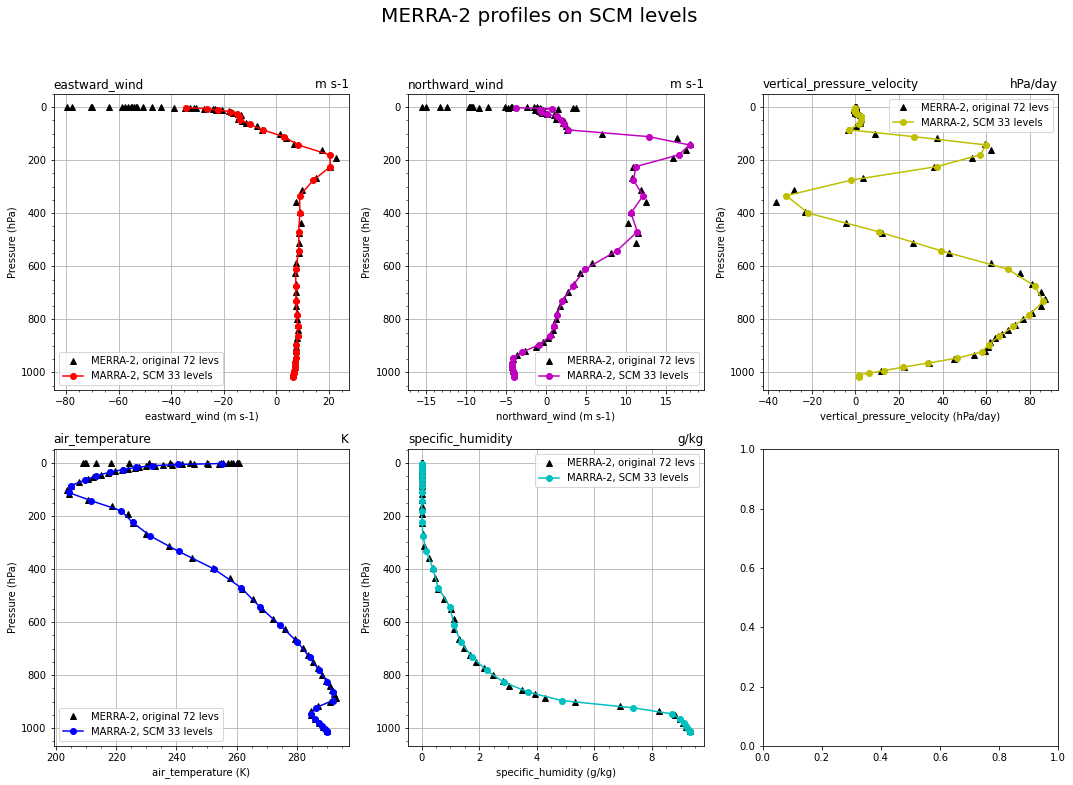

In [86]:
#--- open fig and ax
def ax_def (ax, var):

    #--- set grids
    ax.grid(True)
    ax.minorticks_on()
    
    #--- inverse axes
    ax.invert_yaxis()
    
    #--- legend
    ax.legend(["MERRA-2, original 72 levs","MARRA-2, SCM 33 levels"])
    
    #--- set x or y labels
    ax.set_ylabel("Pressure (hPa)")

    #--- set title
    ax.set_title(var.attrs['long_name'], loc='left')
    ax.set_title(var.attrs['units'], loc='right')
    ax.set_xlabel(var.attrs['long_name']+" ("+var.attrs['units']+")")

#fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(2, 3, figsize=(18, 12))
fig, ((ax_U, ax_V, ax_Omega), (ax_T, ax_Q, ax_dum)) = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

fig.suptitle("MERRA-2 profiles on SCM levels", fontsize=20)

#--- plot U
ax_U.plot(U_merra2, pfull_merra2/100., 'k^',
          U_merra2_inSCM, pfull_merra2_inSCM/100., 'r-o')
ax_def(ax_U, U_merra2)

#--- plot V
ax_V.plot(V_merra2, pfull_merra2/100., 'k^',
          V_merra2_inSCM, pfull_merra2_inSCM/100., 'm-o')
ax_def(ax_V, V_merra2)

#--- plot Omega
ax_Omega.plot(Omega_merra2*864., pfull_merra2/100., 'k^',
              Omega_merra2_inSCM*864., pfull_merra2_inSCM/100., 'y-o')
var_dum = Omega_merra2.copy()
var_dum.attrs['units'] = "hPa/day"
ax_def(ax_Omega, var_dum)

#--- plot T
ax_T.plot(T_merra2, pfull_merra2/100., 'k^',
          T_merra2_inSCM, pfull_merra2_inSCM/100., 'b-o')
ax_def(ax_T, T_merra2)

#--- plot Q
ax_Q.plot(Q_merra2*1000., pfull_merra2/100., 'k^',
          Q_merra2_inSCM*1000., pfull_merra2_inSCM/100., 'c-o')
var_dum = Q_merra2.copy()
var_dum.attrs['units'] = "g/kg"
ax_def(ax_Q, var_dum)

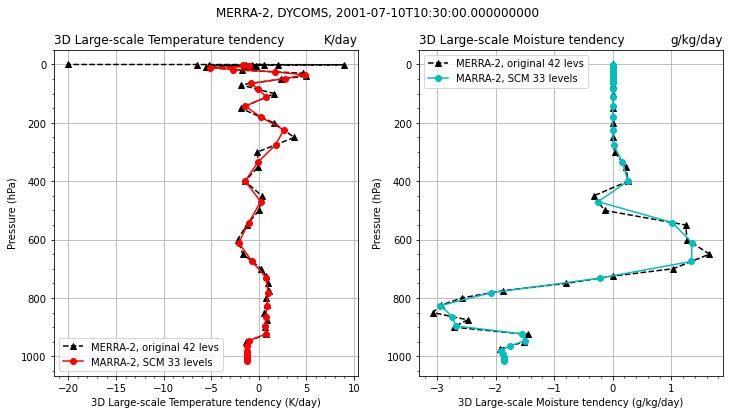

In [87]:
fig, (ax_divT, ax_divq) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("MERRA-2, "+region+", "+time_step_merra2)

#--- plot divT
ax_divT.plot(divT3d_merra2*86400., plev_merra2, 'k--^',
             divT3d_merra2_inSCM*86400., pfull_merra2_inSCM/100., 'r-o',
            )
var_dum = divT3d_merra2.copy()
var_dum.attrs['long_name'] = "3D Large-scale Temperature tendency"
var_dum.attrs['units'] = "K/day"
ax_def(ax_divT, var_dum)
ax_divT.legend(["MERRA-2, original 42 levs","MARRA-2, SCM 33 levels"])

#--- plot divq
ax_divq.plot(divq3d_merra2*864e+5, plev_merra2, 'k--^',
             divq3d_merra2_inSCM*864e+5, pfull_merra2_inSCM/100., 'c-o',
            )
var_dum = divq3d_merra2.copy()
var_dum.attrs['long_name'] = "3D Large-scale Moisture tendency"
var_dum.attrs['units'] = "g/kg/day"
ax_def(ax_divq, var_dum)
ax_divq.legend(["MERRA-2, original 42 levs","MARRA-2, SCM 33 levels"])

